# Proceso EDA sobre dataset

Comienzo el proceso de EDA, primero controlando valores nulos, duplicados

In [1]:
import pandas as pd

In [2]:
dfeda = pd.read_parquet('movies_datasets.parquet')
dfeda.sample(5)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
27110,0.0,"[drama, comedy]",118444,en,"Follow-up to Andy Griffith's big hit in ""No Ti...",0.087466,[warner bros.],[united states of america],1958-10-25,0.0,...,onionhead,6.0,2.0,1958,10,0.0,None,Saturday,"[andy griffith, felicia farr, walter matthau, ...",norman taurog
39598,0.0,"[adventure, action]",17288,tr,A Turkish commando must infiltrate and capture...,0.412342,"[dark maze studios, anit ticaret]",[turkey],1986-06-12,0.0,...,rampage,6.0,2.0,1986,6,0.0,Sherlock Holmes: The Golden Years Collection,Thursday,"[serdar kebapçilar, osman betin, togrul meteer...",çetin inanç
25911,0.0,"[action, thriller]",24023,en,Johan works in tandem with the GSI organized c...,1.650679,[nordisk film],[sweden],2009-06-25,0.0,...,johan falk: gsi - gruppen för särskilda insatser,7.2,12.0,2009,6,0.0,None,Thursday,"[jakob eklund, joel kinnaman, mikael tornving,...",anders nilsson
43885,0.0,[comedy],347630,en,Two foreign exchange high-school students are ...,1.595163,"[angry adam productions, laid in america, fun ...",[united states of america],2016-09-26,0.0,...,laid in america,6.2,27.0,2016,9,0.0,None,Monday,"[olajide olatunji, caspar lee, bobby lee, ange...",sam milman
31299,0.0,"[drama, mystery]",124042,en,A young woman moves with her mother to her mot...,0.256955,"[lifetime movie network, michele brustin produ...",[united states of america],1996-11-04,0.0,...,buried secrets,4.0,2.0,1996,11,0.0,None,Monday,"[tiffani thiessen, tim matheson, melinda culea...",michael toshiyuki uno


## Nulos en columnas

In [3]:
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45452 non-null  float64       
 1   genres                45452 non-null  object        
 2   id                    45452 non-null  int64         
 3   original_language     45441 non-null  object        
 4   overview              44511 non-null  object        
 5   popularity            45452 non-null  float64       
 6   production_companies  45452 non-null  object        
 7   production_countries  45452 non-null  object        
 8   release_date          45452 non-null  datetime64[ns]
 9   revenue               45452 non-null  float64       
 10  runtime               45206 non-null  float64       
 11  spoken_languages      45452 non-null  object        
 12  status                45372 non-null  object        
 13  tagline         

Convierto a None valores de listas vacias en la columna donde existan

Creo una función para este trabajo

In [4]:
def cambiar_list_vacia (df, columna):
    '''La funcion recibe un dataframe y un nombre de columna,
     Si la columna tiene listas vacias las convierte a None

     Parámetros
     df (dataframe): El dataframe a procesar
     columna (str): El nombre de la columna a procesar

     Respuesta
     df (dataframe): El dataframe con las listas vacias convertidas a None
    '''
    df.loc[df[columna].map(lambda x: x is not None and len(x) == 0),  columna] = None

In [5]:
cambiar_list_vacia(dfeda,'actores')
cambiar_list_vacia(dfeda,'genres')
cambiar_list_vacia(dfeda,'production_companies')
cambiar_list_vacia(dfeda,'production_countries')

In [6]:
dfeda[dfeda['overview'].isnull()]

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
32,0.0,"[romance, adventure]",78802,fr,None,0.745542,[iwerks entertainment],"[france, united states of america]",1996-09-18,0.0,...,wings of courage,6.8,4.0,1996,9,0.000000,None,Wednesday,"[craig sheffer, elizabeth mcgovern, tom hulce,...",jean-jacques annaud
300,22000000.0,"[drama, comedy]",161495,sv,None,3.395867,"[hollywood pictures, interscope communications...",[united states of america],1995-03-01,12400000.0,...,roommates,6.4,7.0,1995,3,0.563636,None,Wednesday,"[peter falk, d. b. sweeney, julianne moore, el...",peter yates
634,0.0,[comedy],287305,de,None,0.066123,[westdeutscher rundfunk (wdr)],[germany],1996-03-21,0.0,...,peanuts – die bank zahlt alles,4.0,1.0,1996,3,0.000000,None,Thursday,"[ulrich mühe, iris berben, marita marschall, r...",carlo rola
635,0.0,[comedy],339428,de,None,0.002229,[senator film produktion],[germany],1996-03-14,65335.0,...,happy weekend,0.0,0.0,1996,3,0.000000,None,Thursday,"[erik goertz, anton rattinger, dieter wardetzk...",None
641,0.0,[comedy],10801,de,None,0.821299,[constantin film],[germany],1996-03-06,0.0,...,the superwife,5.3,7.0,1996,3,0.000000,None,Wednesday,"[veronica ferres, til schweiger, joachim król,...",sönke wortmann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45329,0.0,[thriller],395767,fr,None,1.238471,[2425 production],"[belgium, france]",2017-01-11,0.0,...,scribe,5.8,26.0,2017,1,0.000000,None,Wednesday,"[françois cluzet, denis podalydès, sami bouaji...",thomas kruithof
45330,0.0,[drama],199887,en,None,0.704642,"[fox television studios, universal cable produ...",[united states of america],2013-01-04,0.0,...,over/under,4.0,2.0,2013,1,0.000000,None,Friday,"[steven pasquale, caroline dhavernas, anthony ...",bronwen hughes
45365,0.0,[adventure],317389,es,None,0.006352,"[roas produzioni, buton film]",[italy],1973-07-22,0.0,...,simbad e il califfo di bagdad,0.0,0.0,1973,7,0.000000,None,Sunday,"[robert malcolm, sonia wilson, luigi bonos, va...",pietro francisci
45386,1254040.0,"[romance, comedy]",468707,fi,None,0.347806,[elokuvayhtiö oy aamu],[finland],2017-07-28,0.0,...,thick lashes of lauri mäntyvaara,8.0,1.0,2017,7,0.000000,None,Friday,"[inka haapamäki, rosa honkonen, tiitus rantala...",hannaleena hauru


## Duplicados en columnas

Verifico las filas con id repetido y luego elimino filas.

In [7]:
duplicados = dfeda['id'].duplicated()
dfeda[duplicados]


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
677,0.0,"[drama, romance]",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[studio babelsberg, centre national de la ciné...",[germany],1995-02-16,0.0,...,the promise,5.0,1.0,1995,2,0.000000,None,Thursday,"[corinna harfouch, meret becker, august zirner...",margarethe von trotta
838,0.0,[drama],132641,ja,"Ten years into a marriage, the wife is disappo...",0.096079,[toho company],[japan],1953-04-29,0.0,...,wife,0.0,0.0,1953,4,0.000000,None,Wednesday,"[mieko takamine, ken uehara, rentarô mikuni, m...",mikio naruse
950,4.0,"[drama, romance, war]",22649,en,British nurse Catherine Barkley (Helen Hayes) ...,1.914697,[paramount pictures],[united states of america],1932-12-08,25.0,...,a farewell to arms,6.2,29.0,1932,12,6.250000,None,Thursday,"[helen hayes, gary cooper, adolphe menjou, mar...",frank borzage
1466,0.0,"[drama, romance]",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[studio babelsberg, centre national de la ciné...",[germany],1995-02-16,0.0,...,the promise,5.0,1.0,1995,2,0.000000,None,Thursday,"[corinna harfouch, meret becker, august zirner...",margarethe von trotta
1467,0.0,"[drama, romance]",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[studio babelsberg, centre national de la ciné...",[germany],1995-02-16,0.0,...,the promise,5.0,1.0,1995,2,0.000000,None,Thursday,"[corinna harfouch, meret becker, august zirner...",margarethe von trotta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44812,16000000.0,"[adventure, fantasy, animation, action, family]",10991,ja,When Molly Hale's sadness of her father's disa...,6.480376,"[tv tokyo, 4 kids entertainment, nintendo, pik...",[japan],2000-07-08,68411275.0,...,pokémon: spell of the unknown,6.0,144.0,2000,7,4.275705,None,Saturday,"[veronica taylor, rachael lillis, eric stuart]",michael haigney
44817,0.0,"[adventure, fantasy, animation, science fictio...",12600,ja,"All your favorite Pokémon characters are back,...",6.080108,None,"[japan, united states of america]",2001-07-06,28023563.0,...,pokémon 4ever: celebi - voice of the forest,5.7,82.0,2001,7,0.000000,None,Friday,"[veronica taylor, rachael lillis, maddie blaus...",kunihiko yuyama
44818,0.0,"[adventure, fantasy, animation, science fictio...",12600,ja,"All your favorite Pokémon characters are back,...",6.080108,None,"[japan, united states of america]",2001-07-06,28023563.0,...,pokémon 4ever: celebi - voice of the forest,5.7,82.0,2001,7,0.000000,None,Friday,"[veronica taylor, rachael lillis, maddie blaus...",kunihiko yuyama
45253,0.0,"[comedy, drama]",265189,sv,"While holidaying in the French Alps, a Swedish...",12.165685,"[motlys, coproduction office, film i väst]","[norway, sweden, france]",2014-08-15,1359497.0,...,force majeure,6.8,255.0,2014,8,0.000000,Frankenstein (Hammer Series),Friday,"[lisa loven kongsli, johannes bah kuhnke, clar...",ruben östlund


In [8]:
dfeda.drop_duplicates(subset='id', inplace=True)
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45451
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  float64       
 1   genres                42962 non-null  object        
 2   id                    45346 non-null  int64         
 3   original_language     45335 non-null  object        
 4   overview              44405 non-null  object        
 5   popularity            45346 non-null  float64       
 6   production_companies  33557 non-null  object        
 7   production_countries  39138 non-null  object        
 8   release_date          45346 non-null  datetime64[ns]
 9   revenue               45346 non-null  float64       
 10  runtime               45100 non-null  float64       
 11  spoken_languages      45346 non-null  object        
 12  status                45266 non-null  object        
 13  tagline              

Reviso la situación de 'overview'. Primero los duplicados

In [9]:
duplicados = dfeda['overview'].duplicated()
dfeda[duplicados & dfeda['overview'].notnull()]


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
799,0.0,"[drama, foreign]",12632,de,No overview found.,0.000578,None,"[austria, germany, sweden]",1993-09-11,0.0,...,kaspar hauser,6.3,4.0,1993,9,0.0,None,Saturday,"[andré eisermann, udo samel, jeremy clyde, kat...",peter sehr
973,0.0,[comedy],25739,en,No overview found.,0.000308,None,None,1979-08-22,0.0,...,l'associé,6.0,3.0,1979,8,0.0,None,Wednesday,"[michel serrault, claudine auger, catherine al...",rené gainville
1615,1000000.0,"[horror, science fiction]",29938,en,No overview found.,0.106499,None,[united states of america],1996-01-01,0.0,...,alien escape,4.5,2.0,1996,1,0.0,None,Monday,"[gail harris, bernie van de yacht, heather for...",scott harris
2232,0.0,"[comedy, thriller]",8336,en,No overview found.,0.942562,None,[united states of america],1998-08-02,0.0,...,the naked man,6.0,3.0,1998,8,0.0,None,Sunday,"[michael rapaport, michael jeter, rachael leig...",j. todd anderson
3291,0.0,"[drama, romance, foreign]",31336,fr,No overview found.,0.394300,"[eurimages, k2 sa, canal+, radio télévision be...","[france, belgium, switzerland]",1999-05-19,0.0,...,the carriers are waiting,7.3,8.0,1999,5,0.0,Final Destination Collection,Wednesday,"[benoît poelvoorde, morgane simon, bouli lanne...",benoît mariage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45239,0.0,[comedy],28469,de,No overview found.,0.192235,[österreichischer rundfunk (orf)],[austria],1961-11-15,0.0,...,der herr karl,10.0,1.0,1961,11,0.0,None,Wednesday,[helmut qualtinger],None
45261,0.0,"[animation, family]",89606,en,No overview found.,0.054726,None,None,1957-03-20,0.0,...,hemo the magnificent,7.0,1.0,1957,3,0.0,None,Wednesday,"[frank baxter, richard carlson, mel blanc, ste...",frank capra
45281,0.0,"[crime, comedy]",31856,en,No overview found.,0.106280,None,[poland],1971-04-30,0.0,...,hydrozagadka,5.3,3.0,1971,4,0.0,None,Friday,"[zdzisław maklakiewicz, józef nowak, roman kło...",andrzej kondratiuk
45375,0.0,None,176298,en,An abstract animation from Walter Ruttmann.,0.256196,None,None,1924-03-11,0.0,...,opus iii,6.9,5.0,1924,3,0.0,None,Tuesday,None,walter ruttmann


Cambio algunos valores que deberían ser nulos, como 'No overview found.'

In [10]:
dfeda.loc[dfeda['overview'] == 'No overview found.',  'overview'] = None
dfeda.loc[dfeda['overview'] == 'No Overview',  'overview'] = None
dfeda.loc[dfeda['overview'] == 'No overview yet.',  'overview'] = None
dfeda.loc[dfeda['overview'] == 'No movie overview available.',  'overview'] = None

Elimino espacios vacíos al comienzo y final de los String

In [11]:
dfeda['overview'] = dfeda['overview'].str.strip()

Corrijo valores vacios en None

In [12]:
dfeda.loc[dfeda['overview'] == '',  'overview'] = None

## Tokenización y normalización de columnas

In [13]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/hugo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Antes de tokenizar reviso el idioma de los títulos de películas tomado como filtro las peliculas con lenguaje original distinto al inglés

In [14]:
dfeda['original_language'].unique() #Lista de idiomas originales de las películas

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', None, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [15]:
mask_languaje = dfeda['original_language'] == 'en' #Máscara para filtrar idiomas distintos de inglés


In [16]:
dfeda = dfeda[mask_languaje] #Reduzco el dataframe a películas de origen inglés para poder usar stopwords


In [17]:
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32184 entries, 0 to 45451
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                32184 non-null  float64       
 1   genres                30543 non-null  object        
 2   id                    32184 non-null  int64         
 3   original_language     32184 non-null  object        
 4   overview              32038 non-null  object        
 5   popularity            32184 non-null  float64       
 6   production_companies  23645 non-null  object        
 7   production_countries  27025 non-null  object        
 8   release_date          32184 non-null  datetime64[ns]
 9   revenue               32184 non-null  float64       
 10  runtime               32179 non-null  float64       
 11  spoken_languages      32184 non-null  object        
 12  status                32117 non-null  object        
 13  tagline              

In [18]:
stopwords = nltk.corpus.stopwords.words('english') # Carga las stopwords en inglés

In [19]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
import re 

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [21]:
def tokenizar_stemmer (df,columna):
    final_list = []
    for texto in df[columna]:
        # Reemplzar los caracteres que no sean leras por espacios
        texto=re.sub("[^a-zA-Z]"," ",str(texto))
        # Pasamos todo a minúsculas
        texto=texto.lower()
        # TOkenizar para separar las palabras
        texto=nltk.word_tokenize(texto)
        # Eliminar las palabras de menos de 2 letras
        texto = [palabra for palabra in texto if len(palabra)>2]
        # Sacar las Stopwords
        texto = [palabra for palabra in texto if not palabra in stopwords]
        
        # Aplicar la funcion para buscar la raiz de las palabras
        texto=[stemmer.stem(palabra) for palabra in texto]
        # Volver a unir el texto
        texto=" ".join(texto)
        
        # Vamos armar una lista con todos los textos
        final_list.append(texto)
    df[columna] = final_list

Tokenizo 'title'

In [22]:
# tokenizar_stemmer(dfeda,'title')

In [23]:
dfeda.title.head()

0                      toy story
1                        jumanji
2               grumpier old men
3              waiting to exhale
4    father of the bride part ii
Name: title, dtype: object

Proceso la columna 'overview'

In [24]:
tokenizar_stemmer(dfeda,'overview')

In [25]:
dfeda.overview.head()

0    led woodi andi toy live happili room andi birt...
1    sibl judi peter discov enchant board game open...
2    famili wed reignit ancient feud next door neig...
3    cheat mistreat step women hold breath wait elu...
4    georg bank recov daughter wed receiv news preg...
Name: overview, dtype: object

Tokenizo 'tagline'

In [26]:
tokenizar_stemmer(dfeda,'tagline')

In [27]:
dfeda.tagline.head()

0                                       none
1                    roll dice unleash excit
2    still yell still fight still readi love
3          friend peopl let never let forget
4             world back normal surpris life
Name: tagline, dtype: object

Tokenizo demás columnas con textos

In [28]:
dfeda.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'release_month', 'return',
       'franchise', 'release_day', 'actores', 'director'],
      dtype='object')

In [29]:
tokenizar_stemmer(dfeda,'genres')
tokenizar_stemmer(dfeda,'production_companies')
tokenizar_stemmer(dfeda,'production_countries')
tokenizar_stemmer(dfeda,'status')
tokenizar_stemmer(dfeda,'franchise')
tokenizar_stemmer(dfeda,'actores')
tokenizar_stemmer(dfeda,'director')


In [30]:
dfeda.sample(10)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
31995,0.0,comedi drama,57479,en,young boy arriv small georgia town bu mother a...,0.246795,hallmark hall fame product,unit state america,1997-11-23,0.0,...,what the deaf man heard,3.3,4.0,1997,11,0.000000,none,Sunday,matthew modin clair bloom judith ivey jame ear...,john kent harrison
42786,4200000.0,drama,405204,en,touko laaksonen decor offic return home harrow...,2.808389,helsinki filmi fridthjof film neutrino product...,finland unit state america sweden denmark germani,2017-01-27,0.0,...,tom of finland,7.5,8.0,2017,1,0.000000,none,Friday,pekka strang lauri tilkanen jakob oftebro wern...,dome karukoski
14680,0.0,comedi drama famili,20551,en,jim varney recur dim bulb charact ernest worre...,1.229301,none,none,1994-12-14,0.0,...,ernest goes to school,3.7,9.0,1994,12,0.000000,puppet master collect,Wednesday,jim varney,coke sam
32114,0.0,drama,231616,en,ident twin andi pete goodwynn side side sinc w...,0.493106,none,none,2013-04-05,0.0,...,brother's keeper,4.8,3.0,2013,4,0.000000,none,Friday,alex miller graham miller ray wise daniel samo...,amato
16242,0.0,horror,28155,en,monster child return three,1.559330,warner bro larco product,unit state america,1978-05-10,0.0,...,it lives again,4.9,17.0,1978,5,0.000000,none,Wednesday,freder forrest kathleen lloyd john ryan john m...,larri cohen
1375,55000000.0,action thriller crime,34314,en,flight transport danger convict murder ryan we...,5.304043,metro goldwyn mayer mgm rysher entertain,unit state america,1997-01-09,11466088.0,...,turbulence,5.2,63.0,1997,1,0.208474,polic stori collect,Thursday,ray liotta lauren holli brendan gleeson ctor e...,robert butler
14397,65000000.0,anim action famili scienc fiction,16577,en,set futurist metro citi astro boy young robot ...,13.293466,weinstein compani summit entertain tezuka prod...,hong kong japan unit state america,2009-10-15,44091067.0,...,astro boy,6.1,420.0,2009,10,0.678324,none,Thursday,nicola cage kristen bell bill nighi donald sut...,david bower
20870,0.0,action comedi,32100,en,dolemit come rescu queen bee whose nightclub t...,0.991969,comedian intern,unit state america,1976-10-02,0.0,...,the human tornado,5.8,12.0,1976,10,0.000000,none,Saturday,rudi ray moor ladi reed baron erni hudson glor...,cliff roquemor
307,0.0,horror drama,92769,en,linda peter pratman son adam autist still love...,0.499601,allegro film norstar entertain west wind enter...,canada,1995-10-03,0.0,...,relative fear,4.7,3.0,1995,10,0.000000,none,Tuesday,darlann fluegel jame brolin martin neufeld den...,georg mihalka
40035,110000000.0,drama action,296524,en,stori set offshor drill rig deepwat horizon ex...,13.198400,bonaventura pictur summit entertain particip m...,hong kong unit state america,2016-09-29,121790373.0,...,deepwater horizon,6.5,1478.0,2016,9,1.107185,none,Thursday,mark wahlberg kurt russel john malkovich gina ...,peter berg


## Nubes de palabras

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Nube de títulos

In [32]:
text_data = dfeda['title']


In [33]:
text_data

0                          toy story
1                            jumanji
2                   grumpier old men
3                  waiting to exhale
4        father of the bride part ii
                    ...             
45446                caged heat 3000
45447                     robin hood
45449                       betrayal
45450               satan triumphant
45451                       queerama
Name: title, Length: 32184, dtype: object

In [34]:
wordcloud = WordCloud(width=800, height=600, random_state=42).generate(','.join(text_data))

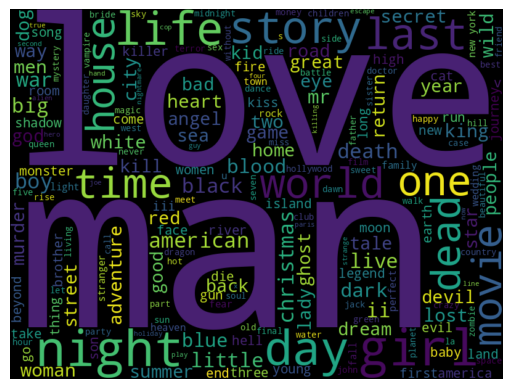

In [35]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sobresalen 2 palabras 'love' y 'man'. Muy presentes en los títulos

### Nube de Overview

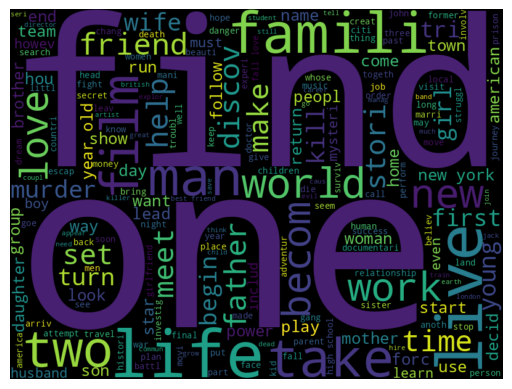

In [36]:
text_data1 = dfeda['overview']
wordcloud1 = WordCloud(width=800, height=600, random_state=42).generate(','.join(text_data1))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Un poco más distribuidas las palabras que en la nube anterior, pero sobresalen 2 palabras más qu eel resto: find y one

## Cantidad de películas estrenada por año

In [37]:
dfeda = dfeda.sort_values(by='release_date', ascending=True)
dfeda = dfeda.reset_index(drop=True)
dfeda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
0,0.0,documentari,194079,en,salli gardner gallop one earliest silent film ...,0.327841,palo alto stock farm,unit state america,1878-06-14,0.0,...,sallie gardner at a gallop,6.2,25.0,1878,6,0.0,none,Friday,salli gardner gilbert domm,eadweard muybridg
1,0.0,documentari,426903,en,individu photograph run buffalo shot rapid suc...,0.229221,none,unit state america,1883-11-19,0.0,...,buffalo running,5.4,7.0,1883,11,0.0,pico colecci,Monday,none,eadweard muybridg
2,0.0,none,386743,en,shot flight fli,0.071756,none,none,1890-03-09,0.0,...,mosquinha,6.5,2.0,1890,3,0.0,none,Sunday,none,tienn jule marey
3,0.0,comedi,32571,en,experiment film made test origin cylind format...,1.163672,edison manufactur compani,unit state america,1890-11-21,0.0,...,"monkeyshines, no. 1",4.3,15.0,1890,11,0.0,none,Friday,giusepp sacco albanes,william dickson
4,0.0,none,416258,en,short film two men fencer,0.036471,none,none,1891-01-02,0.0,...,two fencers,6.0,1.0,1891,1,0.0,none,Friday,none,none


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Almaceno la columna release_year en un objeto
years = dfeda['release_year']

# Con el método value_counts cuento la frecuencia de cada año
year_counts = years.value_counts().sort_index()


/tmp/ipykernel_1181382/861441914.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


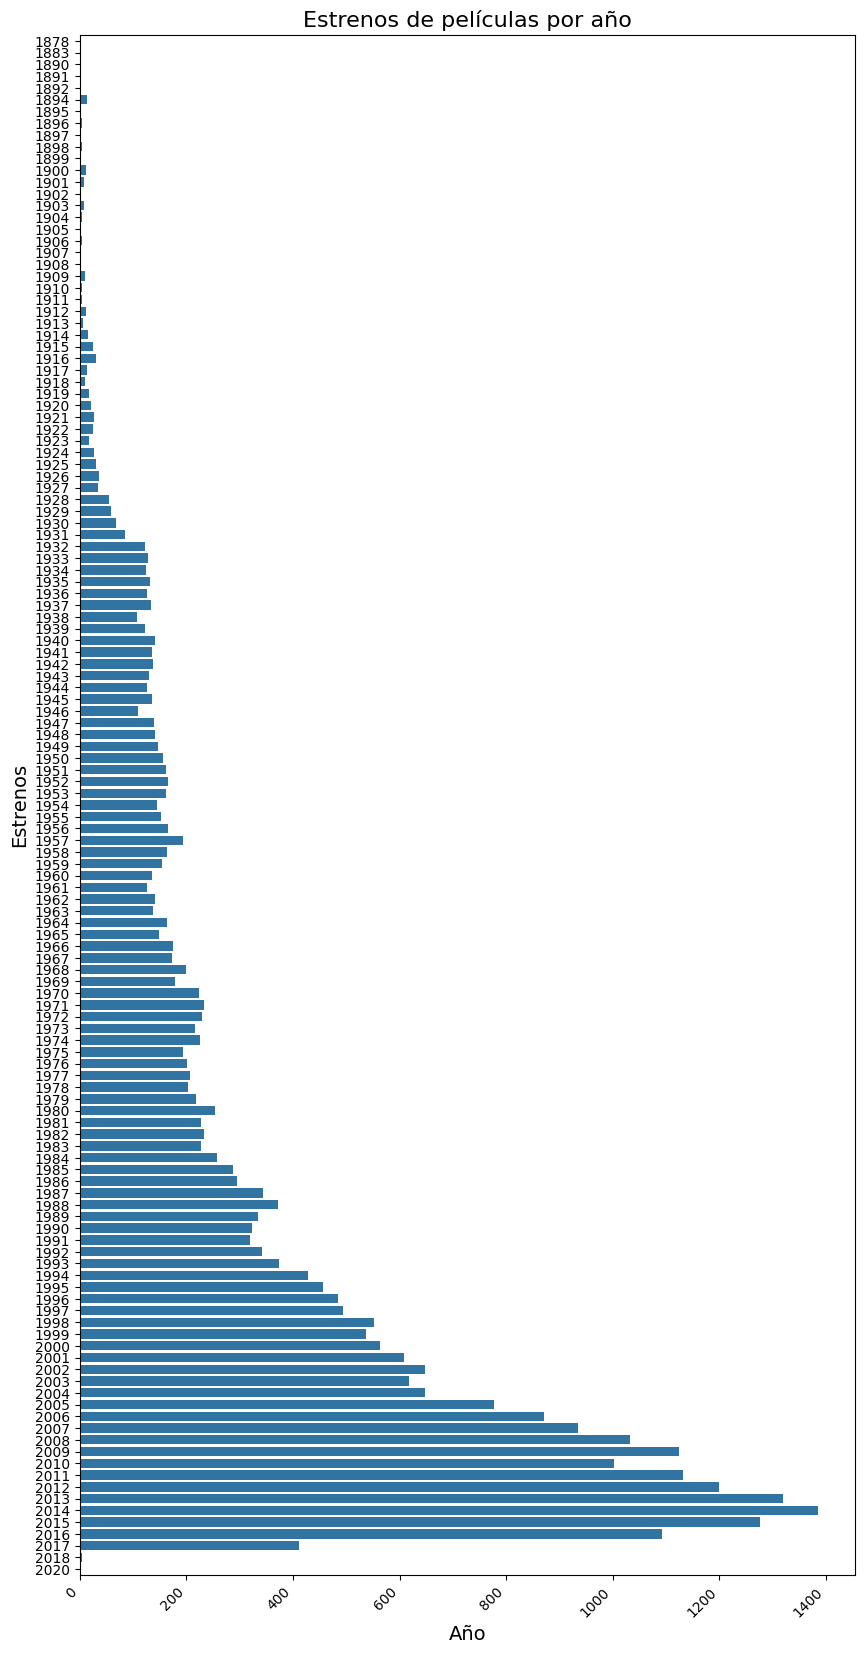

In [39]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(year_counts,orient='h')
ax.set_xlabel('Año',fontsize=14)
ax.set_ylabel('Estrenos',fontsize=14)
ax.set_title('Estrenos de películas por año',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Si observamos la cantidad de estrenos por año, vemos que la mayoría de las películas del dataset podrán ubicarse a partir de 1990

## Frecuencia de géneros

In [40]:
# Almaceno la columna genres en un objeto
generos = dfeda['genres'].map(lambda x: [item for item in x.split()])

generos = generos.explode()
#Convierto la columna genres a una lista
generos_count = generos.value_counts().sort_index()

In [41]:
generos_count

genres
action          4724
adventur        2674
anim            1244
comedi          9311
crime           3152
documentari     3361
drama          13215
famili          2272
fantasi         1589
fiction         2442
foreign          687
histori          882
horror          3788
movi             712
music           1391
mysteri         1915
none            1641
romanc          4815
scienc          2442
thriller        5980
war              886
western          843
Name: count, dtype: int64

/tmp/ipykernel_1181382/1004739437.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


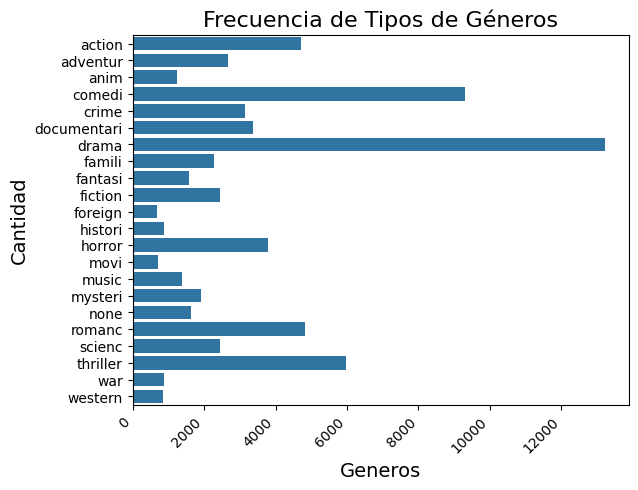

In [42]:
ax1 = sns.barplot(generos_count,orient='h')
ax1.set_title('Frecuencia de Tipos de Géneros', fontsize=16)
ax1.set_xlabel('Generos',fontsize=14)
ax1.set_ylabel('Cantidad',fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.show()

En la distribucion de los géneros, destaca una mayor cantidad de películas del género drama y comedia, seguidos por thriller, romance y acción

### Distribucion de Valoraciones

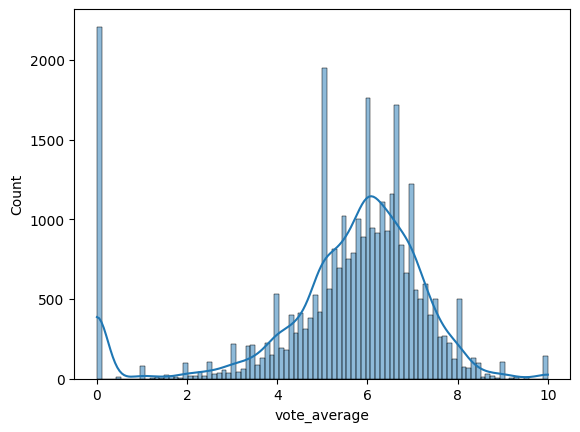

In [43]:
sns.histplot(dfeda['vote_average'], kde=True)
plt.show()

Elimino los valores de  promedio 0

In [44]:
mask_vote = dfeda['vote_average'] != 0
voto_no_cero = dfeda['vote_average'][mask_vote]

In [45]:
voto_no_cero.describe()

count    29975.000000
mean         5.902492
std          1.270906
min          0.500000
25%          5.100000
50%          6.000000
75%          6.700000
max         10.000000
Name: vote_average, dtype: float64

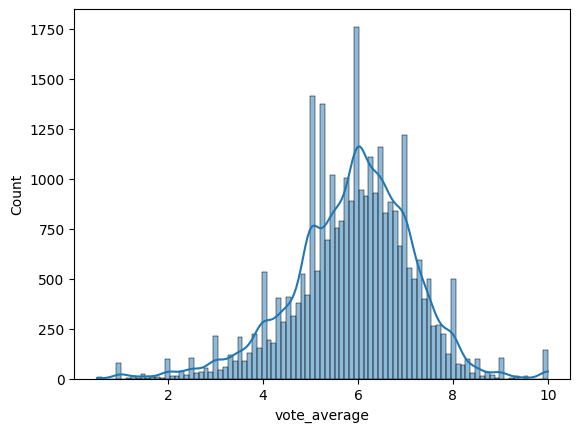

In [46]:
sns.histplot(voto_no_cero, kde=True)
plt.show()

### Distribucion de popularidad

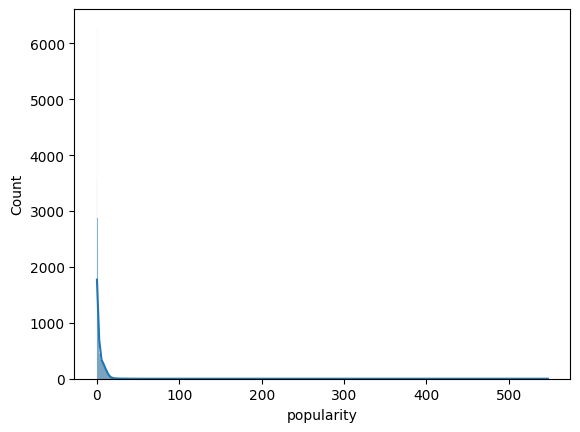

In [47]:
sns.histplot(dfeda['popularity'], kde=True)
plt.show()

<Axes: xlabel='id', ylabel='popularity'>

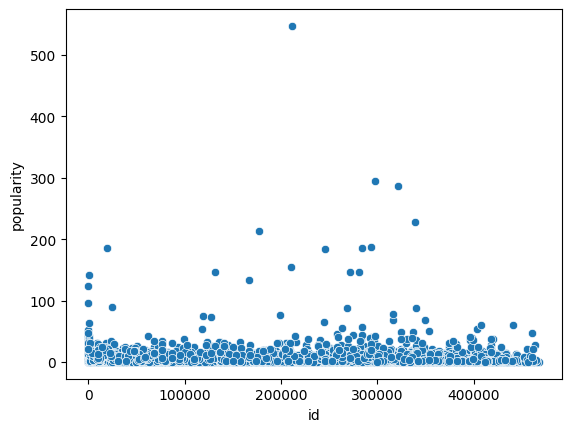

In [48]:
sns.scatterplot(data=dfeda, x='id', y='popularity')

Se observan valores muy distantes en cuanto a la popularidad. Según el diccionario de datos este valor proviene de TMDB. El cual asigna valoración en % a las películas

### Distribucion de Cantidad de votos

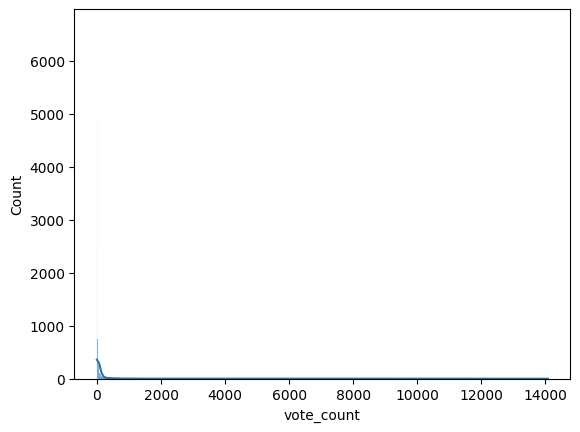

In [49]:
sns.histplot(dfeda['vote_count'], kde=True)
plt.show()

<Axes: xlabel='id', ylabel='vote_count'>

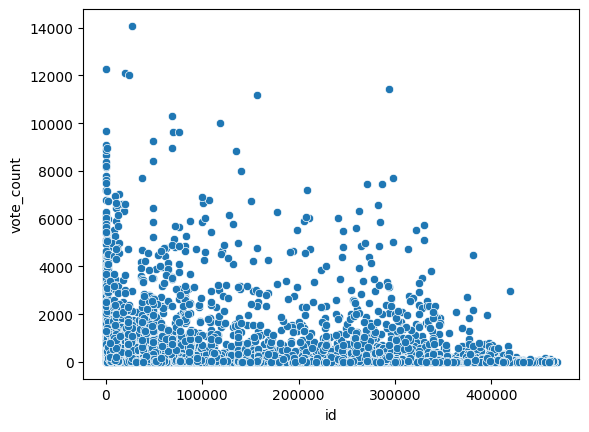

In [50]:
sns.scatterplot(data=dfeda, x='id', y='vote_count')

### Relacion entre cantidad de votos y año de estreno

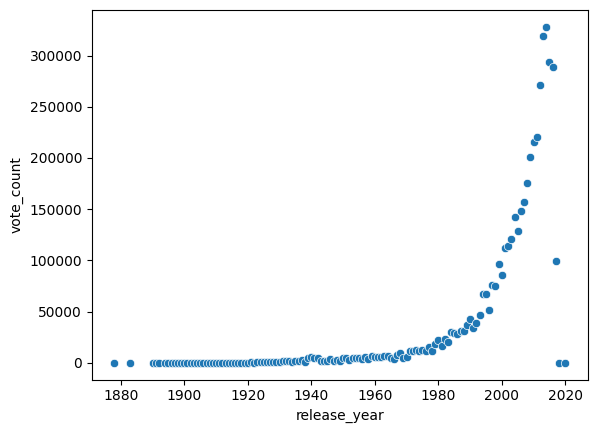

In [51]:
# X = dfeda['release_year'].unique()
vote_year = dfeda.groupby('release_year')['vote_count'].sum()
sns.scatterplot(vote_year)
plt.show()

Es evidente que la cantidad de valoraciones se incrementa con la fecha de estreno de las película

# Momento de preparar el dataset para el modelo de recomendacion

## Análisis de características

In [52]:
dfeda.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'release_month', 'return',
       'franchise', 'release_day', 'actores', 'director'],
      dtype='object')

In [53]:
dfeda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,release_month,return,franchise,release_day,actores,director
0,0.0,documentari,194079,en,salli gardner gallop one earliest silent film ...,0.327841,palo alto stock farm,unit state america,1878-06-14,0.0,...,sallie gardner at a gallop,6.2,25.0,1878,6,0.0,none,Friday,salli gardner gilbert domm,eadweard muybridg
1,0.0,documentari,426903,en,individu photograph run buffalo shot rapid suc...,0.229221,none,unit state america,1883-11-19,0.0,...,buffalo running,5.4,7.0,1883,11,0.0,pico colecci,Monday,none,eadweard muybridg
2,0.0,none,386743,en,shot flight fli,0.071756,none,none,1890-03-09,0.0,...,mosquinha,6.5,2.0,1890,3,0.0,none,Sunday,none,tienn jule marey
3,0.0,comedi,32571,en,experiment film made test origin cylind format...,1.163672,edison manufactur compani,unit state america,1890-11-21,0.0,...,"monkeyshines, no. 1",4.3,15.0,1890,11,0.0,none,Friday,giusepp sacco albanes,william dickson
4,0.0,none,416258,en,short film two men fencer,0.036471,none,none,1891-01-02,0.0,...,two fencers,6.0,1.0,1891,1,0.0,none,Friday,none,none


In [54]:
columnas_ml = ['id', 'title', 'release_year', 'genres', 'tagline','overview','vote_average','actores','director']
dfml = dfeda[columnas_ml]
dfml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32184 entries, 0 to 32183
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32184 non-null  int64  
 1   title         32184 non-null  object 
 2   release_year  32184 non-null  int32  
 3   genres        32184 non-null  object 
 4   tagline       32184 non-null  object 
 5   overview      32184 non-null  object 
 6   vote_average  32184 non-null  float64
 7   actores       32184 non-null  object 
 8   director      32184 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 2.1+ MB


In [55]:
dfml.head()

,id,title,release_year,genres,tagline,overview,vote_average,actores,director
0,194079,sallie gardner at a gallop,1878,documentari,none,salli gardner gallop one earliest silent film ...,6.2,salli gardner gilbert domm,eadweard muybridg
1,426903,buffalo running,1883,documentari,none,individu photograph run buffalo shot rapid suc...,5.4,none,eadweard muybridg
2,386743,mosquinha,1890,none,none,shot flight fli,6.5,none,tienn jule marey
3,32571,"monkeyshines, no. 1",1890,comedi,none,experiment film made test origin cylind format...,4.3,giusepp sacco albanes,william dickson
4,416258,two fencers,1891,none,none,short film two men fencer,6.0,none,none


In [56]:
import numpy as np

In [57]:

dfml['genres'] = dfml['genres'].replace('none', np.nan)
dfml['actores'] = dfml['actores'].replace('none', np.nan)
dfml['director'] = dfml['director'].replace('none', np.nan)
dfml['tagline'] = dfml['tagline'].replace('none', np.nan)

/tmp/ipykernel_1181382/3097284774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfml['genres'] = dfml['genres'].replace('none', np.nan)
/tmp/ipykernel_1181382/3097284774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfml['actores'] = dfml['actores'].replace('none', np.nan)
/tmp/ipykernel_1181382/3097284774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [58]:
dfml.head()

,id,title,release_year,genres,tagline,overview,vote_average,actores,director
0,194079,sallie gardner at a gallop,1878,documentari,NaN,salli gardner gallop one earliest silent film ...,6.2,salli gardner gilbert domm,eadweard muybridg
1,426903,buffalo running,1883,documentari,NaN,individu photograph run buffalo shot rapid suc...,5.4,NaN,eadweard muybridg
2,386743,mosquinha,1890,NaN,NaN,shot flight fli,6.5,NaN,tienn jule marey
3,32571,"monkeyshines, no. 1",1890,comedi,NaN,experiment film made test origin cylind format...,4.3,giusepp sacco albanes,william dickson
4,416258,two fencers,1891,NaN,NaN,short film two men fencer,6.0,NaN,NaN


In [59]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32184 entries, 0 to 32183
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32184 non-null  int64  
 1   title         32184 non-null  object 
 2   release_year  32184 non-null  int32  
 3   genres        30543 non-null  object 
 4   tagline       17914 non-null  object 
 5   overview      32184 non-null  object 
 6   vote_average  32184 non-null  float64
 7   actores       30295 non-null  object 
 8   director      31500 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 2.1+ MB


In [60]:
dfml.to_parquet('datasets_ml.parquet',engine='pyarrow')